# TASK:
You are given House_Price.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles <br>
<br>
(2) After removing outliers in step 1, you get a new dataframe.<br>
<br>
(3) On step(2) dataframe, use 4 standard deviation to remove outliers<br>
<br>
(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram<br>
<br>
(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result



In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('figure',figsize=(12,5))
plt.style.use("ggplot")

In [52]:
df=pd.read_csv('bangalore_property_price.csv')

In [53]:
df.shape

(13200, 7)

In [54]:
df.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [55]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [57]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [58]:
df.price_per_sqft.mean()

7920.336742424242

In [59]:
df.price_per_sqft.std()

106727.16032810845

##  Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [60]:
maximum_threshold = df.price_per_sqft.quantile(.999)
# maximum threshold means the greatest possible amount in reality for anything
# .999 =  99 percentile value

In [61]:
maximum_threshold

50959.36200000098

In [62]:
# we can also detect an outlier in minimum end.
# minimum threshold:an amount which is the smallest that is possible/allowed/required.
minimum_threshold = df.price_per_sqft.quantile(.001)

In [63]:
minimum_threshold

1366.184

In [64]:
# the values beyond maximum and minimum threshold are outliers.
# outliers can be valid, but considering such values will create variation and our modeling will not be proper
df[df.price_per_sqft>maximum_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


## Observation:
- it's impossible for a 1BHK home to have price per square feet 200000 rupees.
- these values are not real enough, we must remove them before modeling.

In [65]:
df[df.price_per_sqft<minimum_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [66]:
# creating a new dataframe removing these outliers:
df_percentile = df[(df.price_per_sqft<maximum_threshold)&(df.price_per_sqft>minimum_threshold)]

In [67]:
df_percentile.shape

(13172, 7)

In [68]:
# how many rows are removed?
df.shape[0] - df_percentile.shape[0]

28

# Step 1 Result:
- we have got pretty decent numbers now
- we have remove 28 rows as outliers
- we have created new dataframe called *df_percentile* after removing outliers.

# Step 2: On df_percentile, use 4 standard deviation to remove outliers.

In [69]:
df_percentile.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [70]:
# create upper and lower limit for 4 standard deviation:
upper_limit = df_percentile.price_per_sqft.mean() + 4 * df_percentile.price_per_sqft.std()

In [71]:
upper_limit

23227.73653589429

In [72]:
df_percentile[df_percentile.price_per_sqft>upper_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [73]:
lower_limit = df_percentile.price_per_sqft.mean() - 4*df_percentile.price_per_sqft.std()

In [74]:
lower_limit

-9900.429065502549

In [75]:
#there's basically no rows beyond lower limit
df_percentile[df_percentile.price_per_sqft<lower_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [76]:
# create a new dataframe removing the outliers:
df_4std = df_percentile[(df_percentile.price_per_sqft>lower_limit) & (df_percentile.price_per_sqft<upper_limit)]

In [77]:
df_4std.shape

(13047, 7)

In [78]:
# How many rows are removed in 4 standard deviation method?
df_percentile.shape[0] - df_4std.shape[0]

125

# Step -3: Plot histogram for new dataframe(df_4std) that is generated . Also plot bell curve on same histogram

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

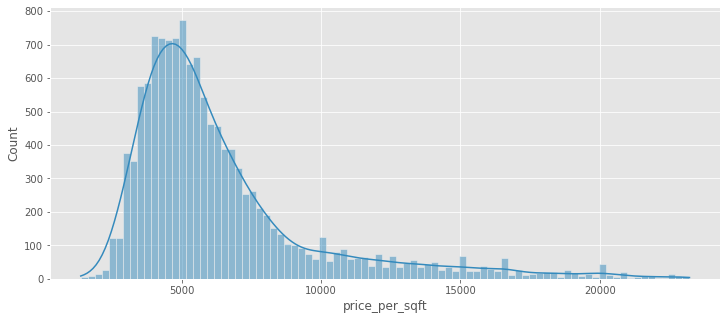

In [79]:
#plotting by seaborn:
sns.histplot(x="price_per_sqft",data=df_4std,kde = True)

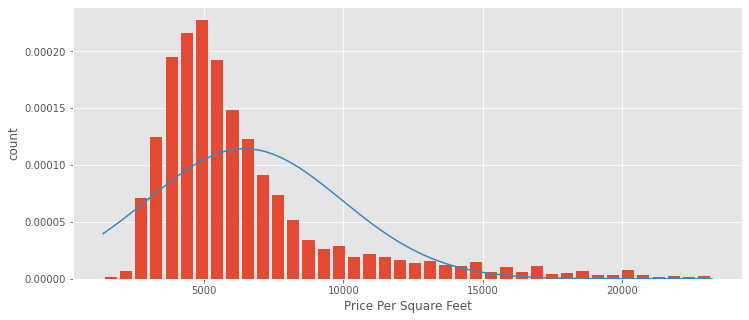

In [80]:
#plotting by matplotlib:
from scipy.stats import norm
plt.hist(df_4std.price_per_sqft, bins = 40, rwidth=0.8,density=True)
plt.xlabel("Price Per Square Feet")
plt.ylabel("count")
# drawing bell curve:
range_price = np.arange(df_4std.price_per_sqft.min(),df_4std.price_per_sqft.max(),0.1)
plt.plot(range_price,norm.pdf(range_price, df_4std.price_per_sqft.mean(),df_4std.price_per_sqft.std()))
plt.show()

## Result:
We have got a positively skewed distribution.
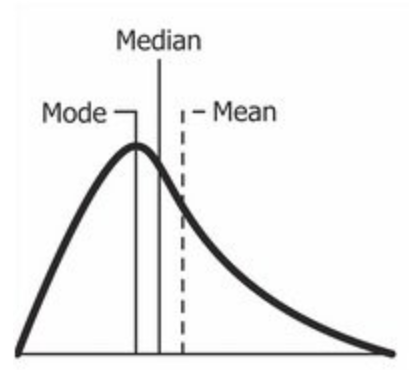
A positively skewed distribution is the distribution with the tail on its right side. The value of skewness for a positively skewed distribution is greater than zero. As you might have already understood by looking at the figure, the value of mean is the greatest one followed by median and then by mode.

# Step 4: On df_percentile, use zscore method to remove outliers and draw the histogram.

In [81]:
#df['z_score'] = (df.Height - df.Height.mean())/df.Height.std()
df_percentile['zscore'] = (df_percentile.price_per_sqft - df_percentile.price_per_sqft.mean())/df_percentile.price_per_sqft.std()

<ipython-input-81-d8d6e022fba2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percentile['zscore'] = (df_percentile.price_per_sqft - df_percentile.price_per_sqft.mean())/df_percentile.price_per_sqft.std()


In [82]:
df_percentile.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [83]:
# we have taken 4 considering 4 standard deviation:
df_percentile[df_percentile.zscore<-4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [84]:
df_percentile[df_percentile.zscore>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [85]:
#now remove outliers:
df_zscore = df_percentile[(df_percentile.zscore<4) & (df_percentile.zscore>-4)]

In [86]:
df_zscore.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [87]:
df_zscore.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

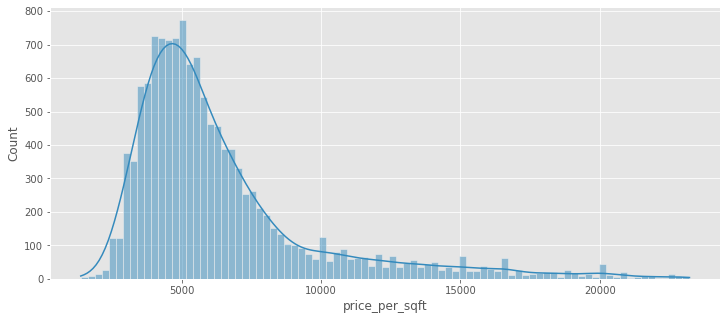

In [88]:
sns.histplot(x="price_per_sqft",data = df_zscore, kde = True)